In [2]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt    
from matplotlib.patches import Rectangle
from astropy.wcs import WCS                 
from astropy import units as u  
import pylab
import numpy as np
from spectral_cube import SpectralCube     
import pyspeckit as psk
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


# Finds center of cloud c

In [3]:
path="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
header=fits.getheader(path)
w1=WCS(header)
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)

#finds the pixel positions for the RA and dec
#find RA DEC of x,y,z
core_coords=w1.pixel_to_world(175,166)
print(core_coords)

<SkyCoord (ICRS): (ra, dec) in deg
    (266.58818356, -28.59536026)>


# Plots Spectrum

(array(144.), array(136.5882353))


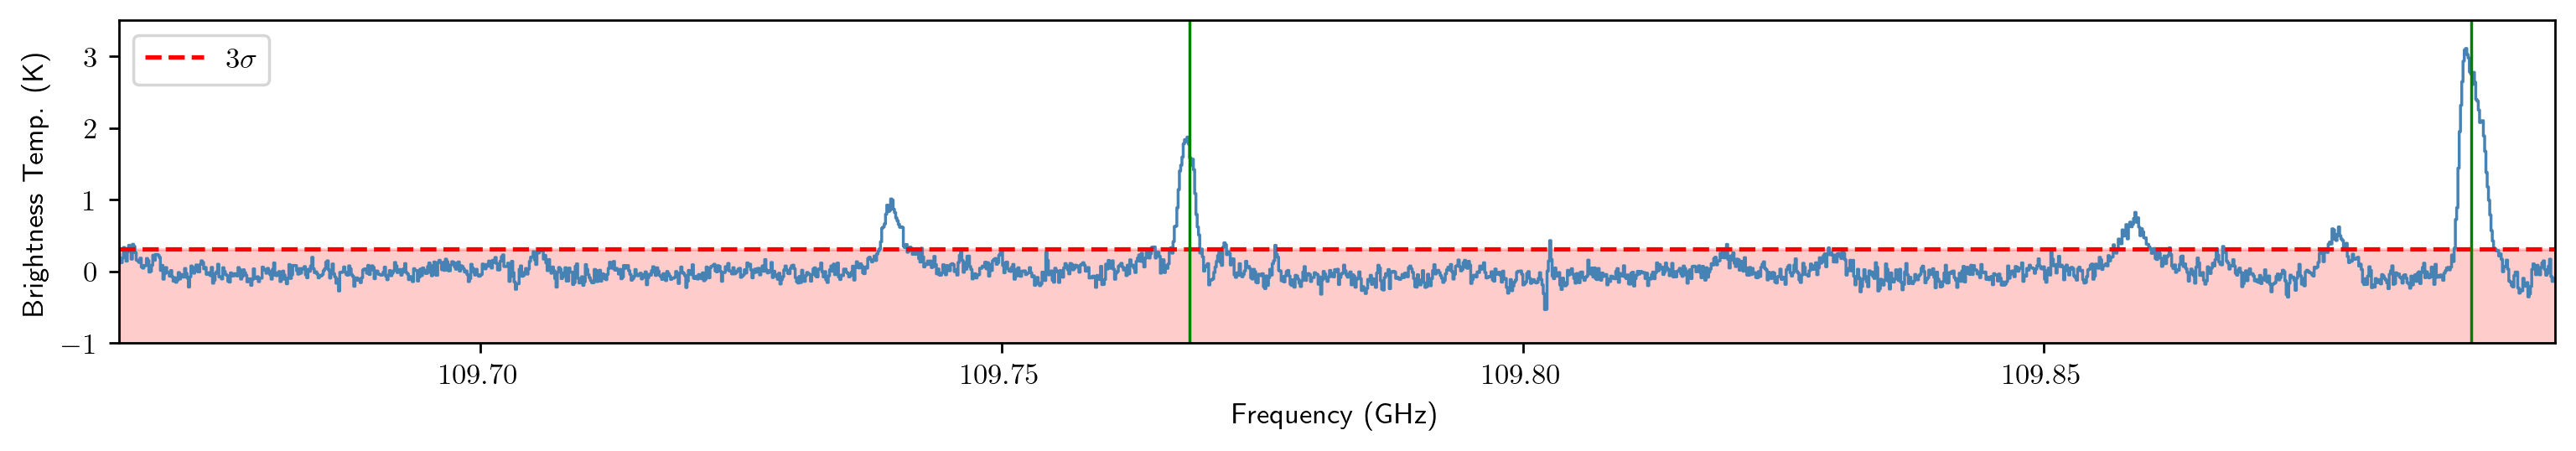

In [18]:

#reads in file
path="A.Dust_Ridge_12C18O.cube.I.pbcor.fits"
#makes figure
fig1=pylab.figure(1,figsize=(15,2),dpi=250)



#find the corresponding pixel positions for those coords in new image
header=fits.getheader(path)
w2=WCS(header)
image_coords=core_coords.to_pixel(w2,0,mode="wcs")
print(image_coords)

#plots spectrum
sc=SpectralCube.read(path)
sc.allow_huge_operations=True 
sc_Ghz=sc.with_spectral_unit(u.GHz)
sc_Ghz=sc_Ghz.to(u.K)
freq,Dec,Ra = sc_Ghz.world[:,0,0] 
subcube=sc_Ghz.hdu.data[:,int(image_coords[0])-5:int(image_coords[0])+5,int(image_coords[1])-5:int(image_coords[1])+5]
spectrum = np.average(subcube,axis=(1,2)) 
ax1=pylab.subplot()
ax1.plot(freq,spectrum,lw=1,drawstyle='steps-mid',color="SteelBlue")
pylab.xlabel("Frequency (GHz)", fontsize=10)
    
pylab.ylabel('Brightness Temp. (K)',fontsize=10)
pylab.ylim(-1,3.5)

plt.rcParams['text.usetex'] = True


three_sigma=3*np.std(spectrum[0:550])
#3 sigma 
pylab.hlines(three_sigma,freq[0].value,freq[1915].value,colors="red",label =r'$3 \sigma$',ls="--" )

pylab.xlim(freq[0].value,freq[1915].value)
ax1.fill_between(freq.value,three_sigma, -2, alpha = 0.2, color= 'red' )

#HCNO
pylab.vlines(109.891,-2,7,colors="green",linewidth=1)

#12C18O
pylab.vlines(109.768,-2,7,colors="green",linewidth=1)

plt.legend()
#plt.title()
plt.savefig("posterspectra_12C18O.png")



# Sigma Calculation

In [7]:
print(freq[550])

109.73243567838483 GHz


# HNCO line ID

Param #0   AMPLITUDE0 =      3.06015 +/-       0.0326286 
Param #1       SHIFT0 =      109.891 +/-     1.26844e-05 
Param #2       WIDTH0 =   0.00103026 +/-     1.26844e-05   Range:   [0,inf)


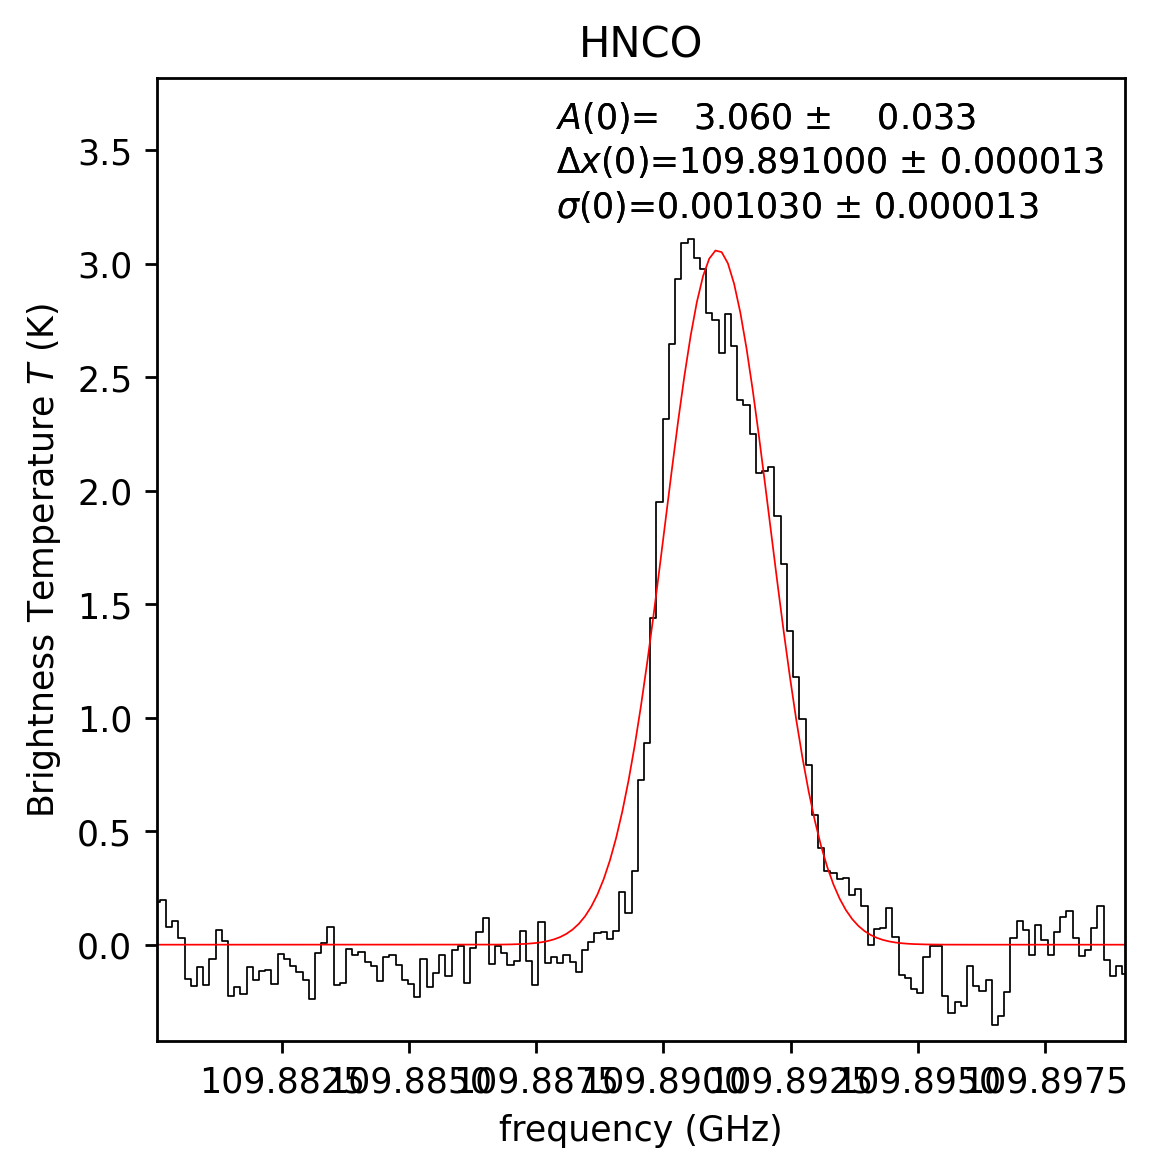

In [16]:
#zooms in on major intensity spike (assumed to be 12CO)
zoom = np.where((freq.value>109.88)*(freq.value<109.9))

#zooms in on the spectrum we found in the last code block
zoom_12C180=spectrum[zoom]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]


error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>109.89)*(zoom_freq.value<109.9))
meas = np.std(spectrum[0:550])
error = error + meas

sp = psk.Spectrum(data=zoom_12C180,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1),title="HNCO")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('12C180gaussianprofileplot.png')
print(sp.specfit.parinfo)

# CO Identification

Param #0   AMPLITUDE0 =      1.88354 +/-       0.0384509 
Param #1       SHIFT0 =      109.768 +/-     1.74876e-05 
Param #2       WIDTH0 =   0.00074187 +/-     1.74876e-05   Range:   [0,inf)


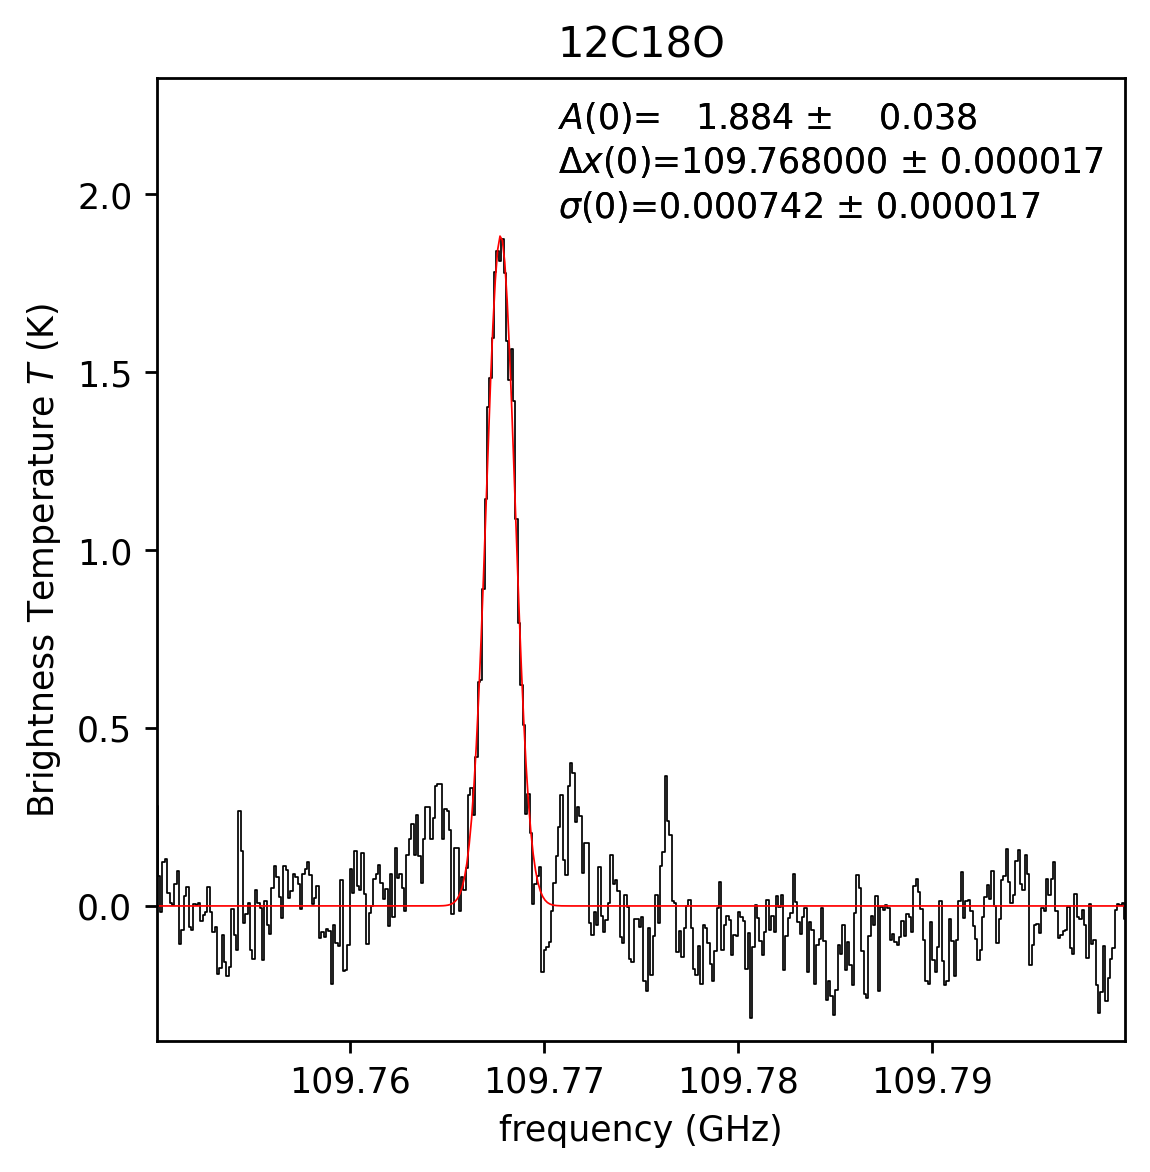

In [18]:
#zooms in on major intensity spike (assumed to be 12CO)
zoom = np.where((freq.value>109.75)*(freq.value<109.8))

#zooms in on the spectrum we found in the last code block
zoom_12C180=spectrum[zoom]

#zooms in on the frequency's in this zoomed in region
zoom_freq = freq[zoom]


error = np.zeros(np.size(zoom))
wheremeas = np.where((zoom_freq.value>109.89)*(zoom_freq.value<109.9))
meas = np.std(spectrum[0:550])
error = error + meas

sp = psk.Spectrum(data=zoom_12C180,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1),title="12C18O")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('12C180gaussianprofileplot.png')
print(sp.specfit.parinfo)